In [13]:
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks', font_scale=1.0)
%matplotlib inline

In [14]:
tt = Table.read('LSLGA-model-v5.0.fits')
#tt

/Users/ioannis/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


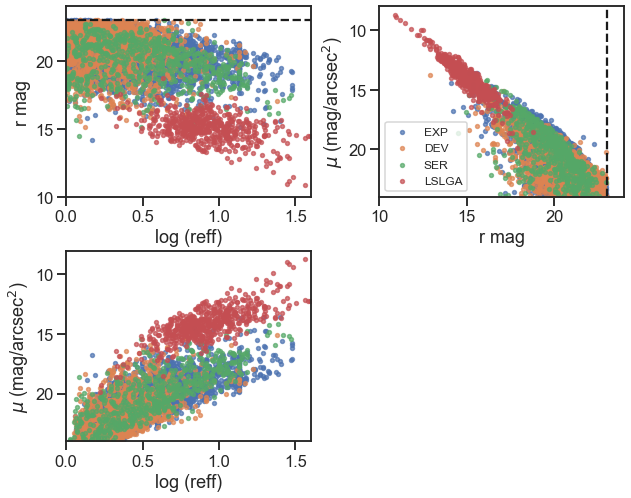

In [22]:
refflim = (0, 1.6)
maglim = (10, 24)
sblim = (24, 8)

reff = np.log10(tt['SHAPE_R'])
mag = 22.5-2.5*np.log10(tt['FLUX_R'])
sb = mag - 2.5 * np.log10(np.pi*reff**2)
fig, ax = plt.subplots(2, 2, figsize=(10, 8))#, sharex=True)
ax = ax.flatten()
for typ in ('EXP', 'DEV', 'SER'):
    ww = (tt['TYPE'] == typ) * (tt['REF_CAT'] != 'L5')
    ax[0].scatter(reff[ww], mag[ww], s=15, alpha=0.7)
    ax[2].scatter(reff[ww], sb[ww], s=15, alpha=0.7)
    ax[1].scatter(mag[ww], sb[ww], s=15, alpha=0.7, label=typ)
    
w2 = tt['REF_CAT'] == 'L5'
ax[0].scatter(reff[w2], mag[w2], s=15, alpha=0.7)
ax[1].scatter(mag[w2], sb[w2], s=15, alpha=0.7, label='LSLGA')
ax[2].scatter(reff[w2], sb[w2], s=15, alpha=0.7, label='LSLGA')

ax[2].set_ylabel(r'$\mu$ (mag/arcsec$^{2}$)')
ax[2].set_xlabel('log (reff)')
ax[2].set_xlim(refflim)
ax[2].set_ylim(sblim)

ax[1].set_ylabel(r'$\mu$ (mag/arcsec$^{2}$)')
ax[1].set_xlabel('r mag')
ax[1].set_xlim(maglim)
ax[1].set_ylim(sblim)
ax[1].axvline(x=23, color='k', ls='--')

ax[0].axhline(y=23, color='k', ls='--')
ax[0].set_ylabel('r mag')
ax[0].set_xlabel('log (reff)')
ax[0].set_xlim(refflim)
ax[0].set_ylim(maglim)

ax[1].legend(loc='lower left', fontsize=12)#, ncol=2)   
ax[3].axis('off')

fig.subplots_adjust(wspace=0.28, hspace=0.28)

In [ ]:
stop

In [27]:
#tt = Table.read('tractor-0300m060.fits')
tt = Table.read('tractor-custom-200923p08689.fits')
tt = Table.read('PGC1351802-pipeline-tractor.fits')
tt = Table.read('PGC1986840-pipeline-tractor.fits')

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


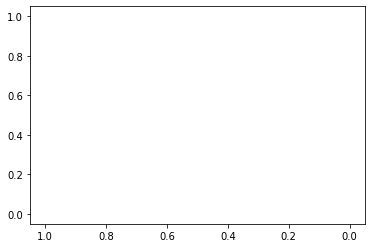

In [28]:
ww = tt['ref_cat'] == 'L5'
print(ww)
fig, ax = plt.subplots()
ax.scatter(tt['ra'][ww], tt['dec'][ww])
ax.invert_xaxis()

In [29]:
tt[ww]['ref_id']

<Column name='ref_id' dtype='int64' length=0>